In [1]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler


In [10]:
df = pd.read_csv('fundamentals.csv')
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [13]:
df = df.drop(['Unnamed: 0','Ticker Symbol','Period Ending','For Year'], axis = 1)
df.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,5.29,7.328355e+07


In [16]:
pd.set_option('display.max_rows', 100)
print(df.isna().sum())
pd.reset_option('display.max_rows')

Accounts Payable                                         0
Accounts Receivable                                      0
Add'l income/expense items                               0
After Tax ROE                                            0
Capital Expenditures                                     0
Capital Surplus                                          0
Cash Ratio                                             299
Cash and Cash Equivalents                                0
Changes in Inventories                                   0
Common Stocks                                            0
Cost of Revenue                                          0
Current Ratio                                          299
Deferred Asset Charges                                   0
Deferred Liability Charges                               0
Depreciation                                             0
Earnings Before Interest and Tax                         0
Earnings Before Tax                                     

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1781 non-null   float64
 1   Accounts Receivable                                  1781 non-null   float64
 2   Add'l income/expense items                           1781 non-null   float64
 3   After Tax ROE                                        1781 non-null   float64
 4   Capital Expenditures                                 1781 non-null   float64
 5   Capital Surplus                                      1781 non-null   float64
 6   Cash Ratio                                           1482 non-null   float64
 7   Cash and Cash Equivalents                            1781 non-null   float64
 8   Changes in Inventories                               1781 non-null  

In [18]:
df=df.dropna()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1779
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1299 non-null   float64
 1   Accounts Receivable                                  1299 non-null   float64
 2   Add'l income/expense items                           1299 non-null   float64
 3   After Tax ROE                                        1299 non-null   float64
 4   Capital Expenditures                                 1299 non-null   float64
 5   Capital Surplus                                      1299 non-null   float64
 6   Cash Ratio                                           1299 non-null   float64
 7   Cash and Cash Equivalents                            1299 non-null   float64
 8   Changes in Inventories                               1299 non-null  

In [19]:
# Train and Test split
X = df.drop('Estimated Shares Outstanding',axis=1) # Everything else but the dependent variable
y=df['Estimated Shares Outstanding']  # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 101)

## B
Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE. (15 pts)

In [22]:
rf = RandomForestRegressor(random_state=101) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

print(f"MSE of RF model: {mse}")

MSE of RF model: 6.6254807894228184e+16


## c
Build random forest with min_samples_split set to 3.  Compare with random forest model in (b).  Explain. (15 pts)

In [23]:
rf2 = RandomForestRegressor(min_samples_split= 3, random_state=101)
rf2.fit(X_train,y_train)

y_pred = rf2.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

print(f"MSE of RF model: {mse}")


MSE of RF model: 7.144827502911333e+16


The MSE for both models are large, and especially for model in (c). It suggests that specifying the mimnium sample split to be 3 doesn't not improve the model. 

## d
Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results. (15 pts)

                        Feature  Importance
68                 Total Equity    0.210519
70   Total Liabilities & Equity    0.121528
65                 Total Assets    0.106086
35      Net Cash Flow-Operating    0.087808
41  Net Income-Cont. Operations    0.080658
..                          ...         ...
42              Net Receivables    0.000635
54        Other Operating Items    0.000536
55               Pre-Tax Margin    0.000521
3                 After Tax ROE    0.000521
34                Net Cash Flow    0.000421

[74 rows x 2 columns]


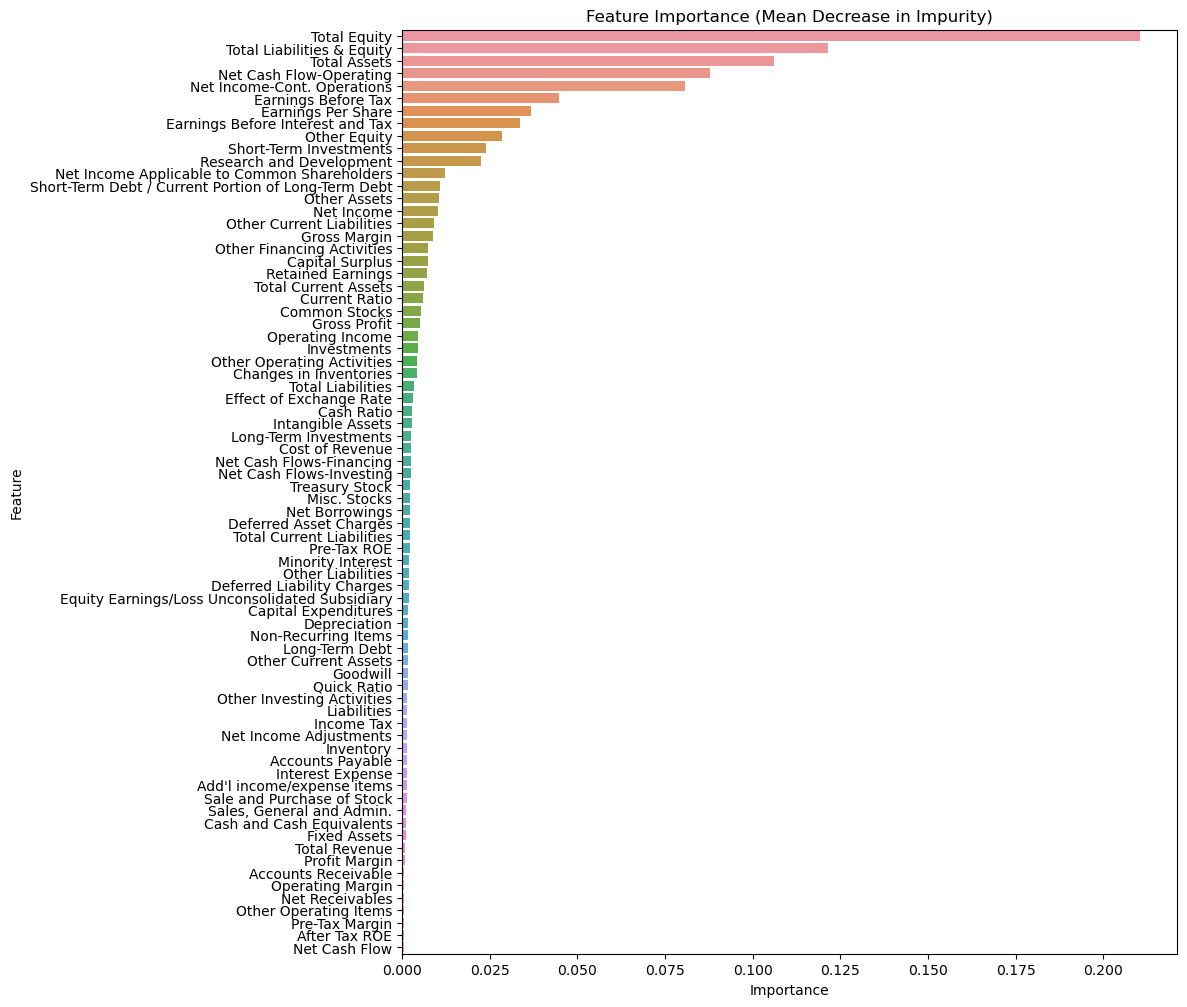

In [27]:
feature_importances_mdi = rf2.feature_importances_

# Create a DataFrame with feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_mdi
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)
# Visualize feature importances in a bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance (Mean Decrease in Impurity)')
plt.show()

                                              Feature  Importance Mean
68                                       Total Equity         0.149744
73                                 Earnings Per Share         0.137433
70                         Total Liabilities & Equity         0.095522
35                            Net Cash Flow-Operating         0.040345
49                                       Other Equity         0.036130
65                                       Total Assets         0.034307
41                        Net Income-Cont. Operations         0.028062
40       Net Income Applicable to Common Shareholders         0.020588
38                                         Net Income         0.019345
64                             Short-Term Investments         0.018086
16                                Earnings Before Tax         0.013566
59                           Research and Development         0.013238
21                                       Gross Margin         0.012485
15    

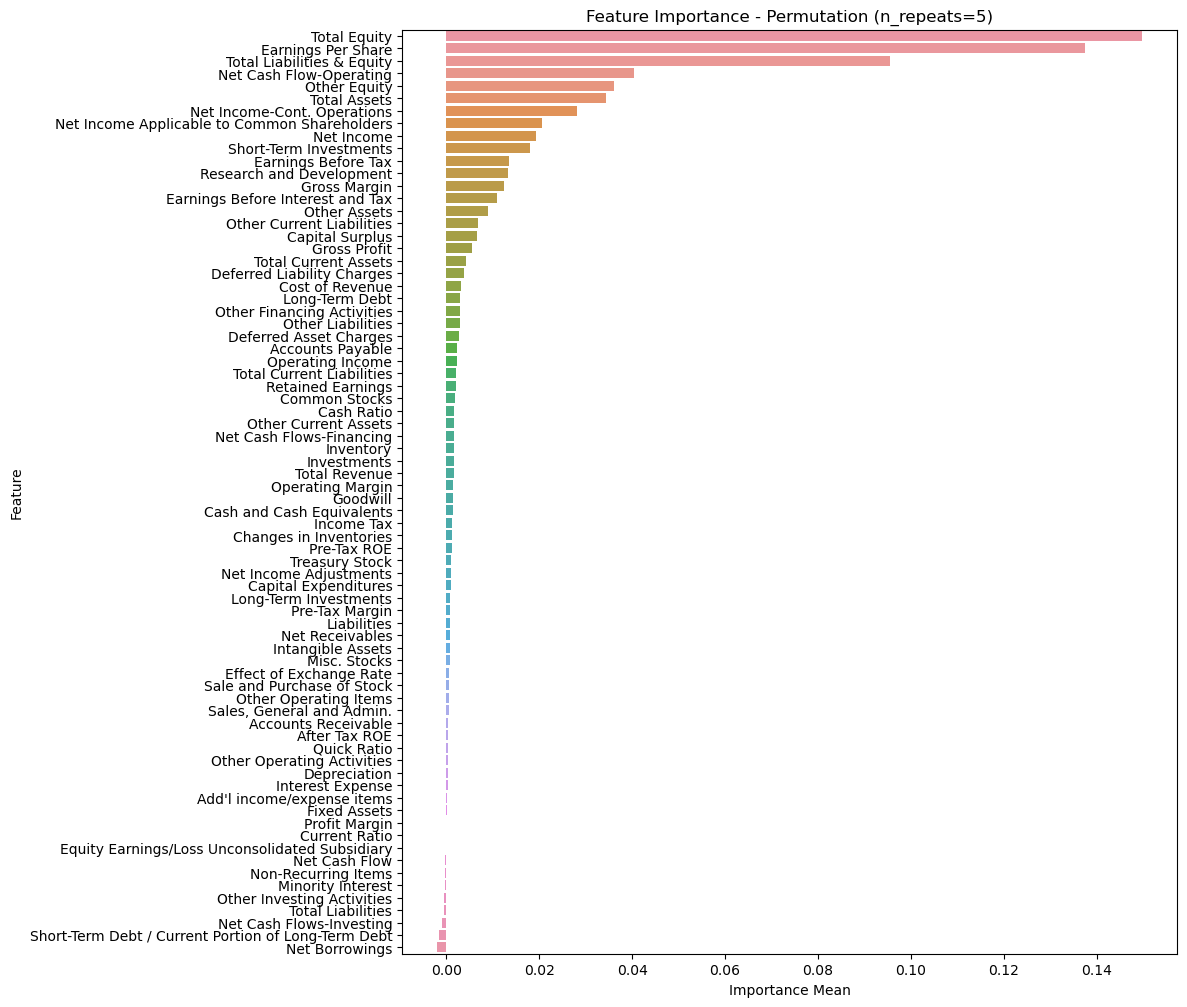

In [33]:
# Calculate permutation feature importance
perm_importance_result = permutation_importance(rf2, X_test, y_test, n_repeats=5, random_state=101)


# Convert the importances into a DataFrame with sorted features
sorted_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_importance_result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)

pd.set_option('display.max_rows', None)
print(sorted_importance_df)
pd.reset_option('display.max_rows')

# Visualize the feature importances using seaborn's barplot function
plt.figure(figsize=(10, 12))
sns.barplot(data=sorted_importance_df, x='Importance Mean', y='Feature', orient='h')
plt.title('Feature Importance - Permutation (n_repeats=5)')
plt.show()

The top 3 most important feasures selected by MDI are Total Equity, Total Liabilitied & Equity, and Total Assets. In contrast, its Total Equity, Earning Per Share, and Total Liability & Equity for Permutation Feature Importance.

MDI calculates total decrease in node impurity attributed to each feature is averaged over the forest and represented as the feature's importance. While PFI is computed after the model has been fitted. It is based on the decrease in a model score when a single feature value is randomly shuffled.

Upon the different machanism, some feature importants are negative using PFI method, indicating a positive impact on the model as they were dropped and suggesting that those features are not important to the model accuracy.


## e
Use the same split to build lasso regression.  Compare with last model (c). (15 pts)

In [34]:
# First Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso =  LassoCV(max_iter= 10000, cv = 5, random_state=101)

# Fit the model and predict on test X
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Compute MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"MSE of Lasso Regression model: {mse_lasso}")

MSE of Lasso Regression model: 1.250726670556287e+17


                                         Feature    Importance
64                        Short-Term Investments  3.484097e+08
5                                Capital Surplus  1.793219e+08
59                      Research and Development  1.649745e+08
38                                    Net Income  1.584602e+08
68                                  Total Equity  1.212484e+08
..                                           ...           ...
35                       Net Cash Flow-Operating  0.000000e+00
1                            Accounts Receivable  0.000000e+00
39                        Net Income Adjustments  0.000000e+00
40  Net Income Applicable to Common Shareholders  0.000000e+00
37                      Net Cash Flows-Investing  0.000000e+00

[74 rows x 2 columns]


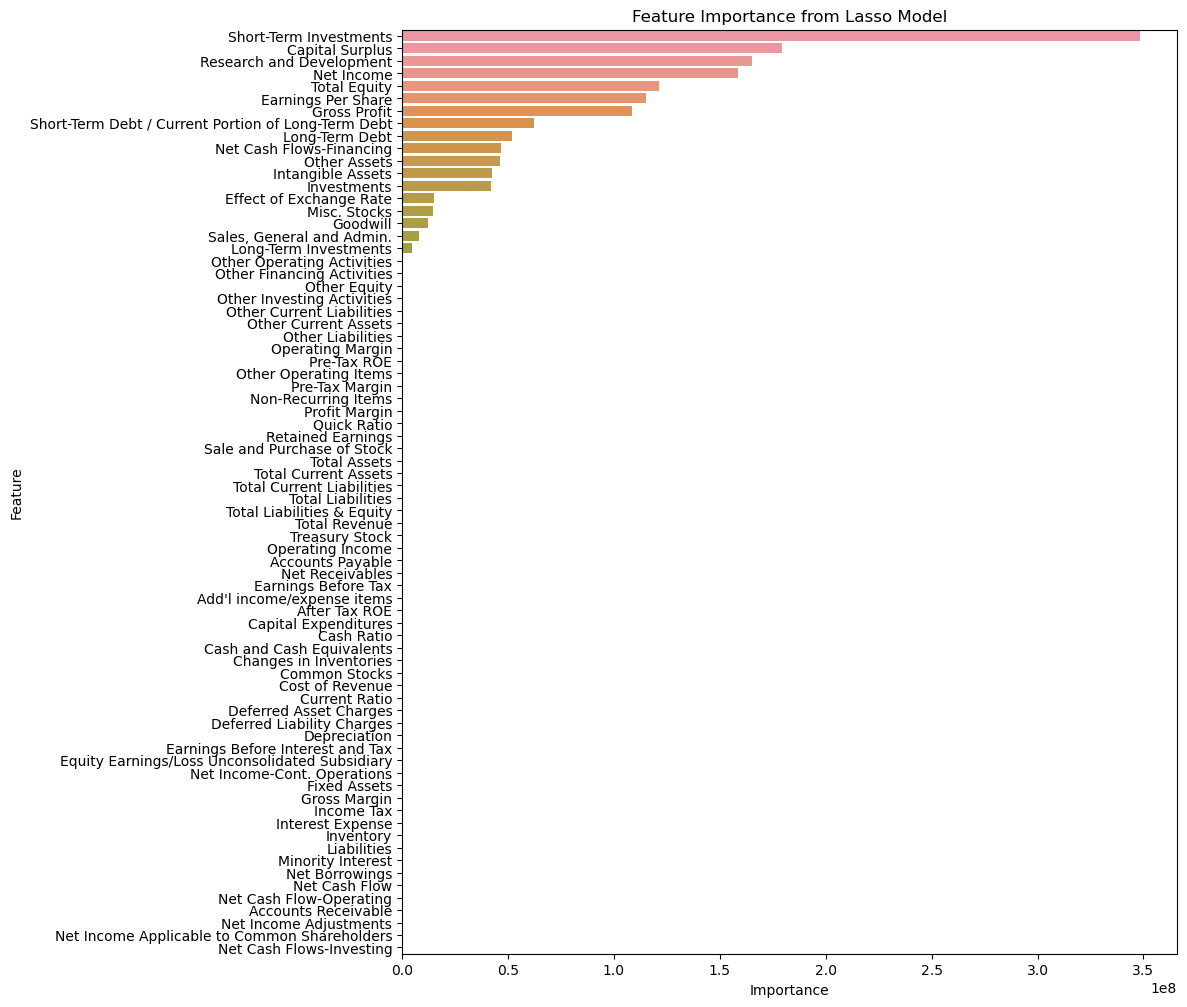

In [40]:
# Extract the coefficients of the lasso model to get the feature importance
lasso_coefficients = lasso.coef_

# Create a DataFrame of feature importances
lasso_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lasso_coefficients
})

lasso_feature_importances['Importance'] = lasso_feature_importances['Importance'].abs()
lasso_feature_importances = lasso_feature_importances.sort_values(by='Importance', ascending=False)
print(lasso_feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 12))
sns.barplot(data=lasso_feature_importances, x='Importance', y='Feature', orient='h')
plt.title('Feature Importance from Lasso Model')
plt.show()

# F
Decision Tree Classification  
Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test. (10 pts)

In [44]:
df2 = pd.read_csv("breast_cancer.csv")

df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2 = df2.drop('id',axis= 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [47]:
X = df2.drop('diagnosis',axis=1)
y=df2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 101)

Confusion Matrix :
 [[98  7]
 [ 9 57]]


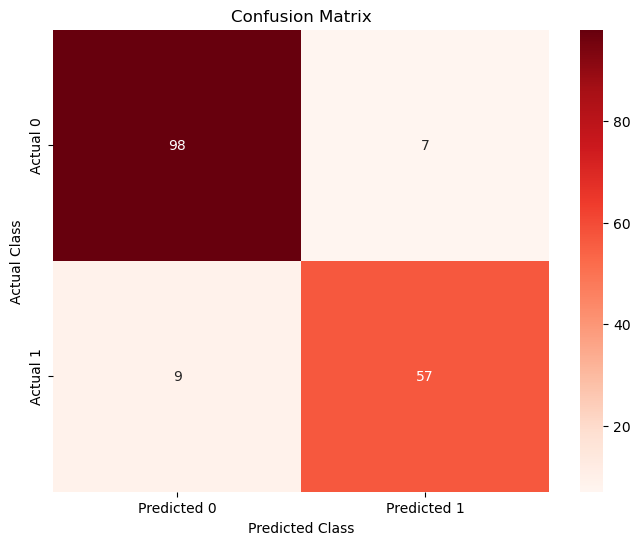

In [56]:

tree = DecisionTreeClassifier(random_state=101)

# Fit the model
tree.fit(X_train, y_train)

# Predict on the test X
y_pred = tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Print the result
print("Confusion Matrix :\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [57]:
# store the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the result
print("Accuracy of the Decision Tree model:", accuracy)
print("Classification Report:\n", class_report)

Accuracy of the Decision Tree model: 0.9064327485380117
Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.93      0.92       105
           M       0.89      0.86      0.88        66

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



True Nagative: There are 98 true 0 values correctly predicted as 0 by the decision tree classificationm.
True Positive: there are 57 true 1 values correctly predicted as 57 by the decision tree classification.
False Negative: 9 observations are predicted as false, while they are actually true.
false positive: 7 observations are predicted to be true, but they are actually false.
The model performs well with high accuracy score of 0.9, and the decision tree model predicts most observations correctly.

## g
Visualize the tree.  What variables are in the plot? (10 pts)

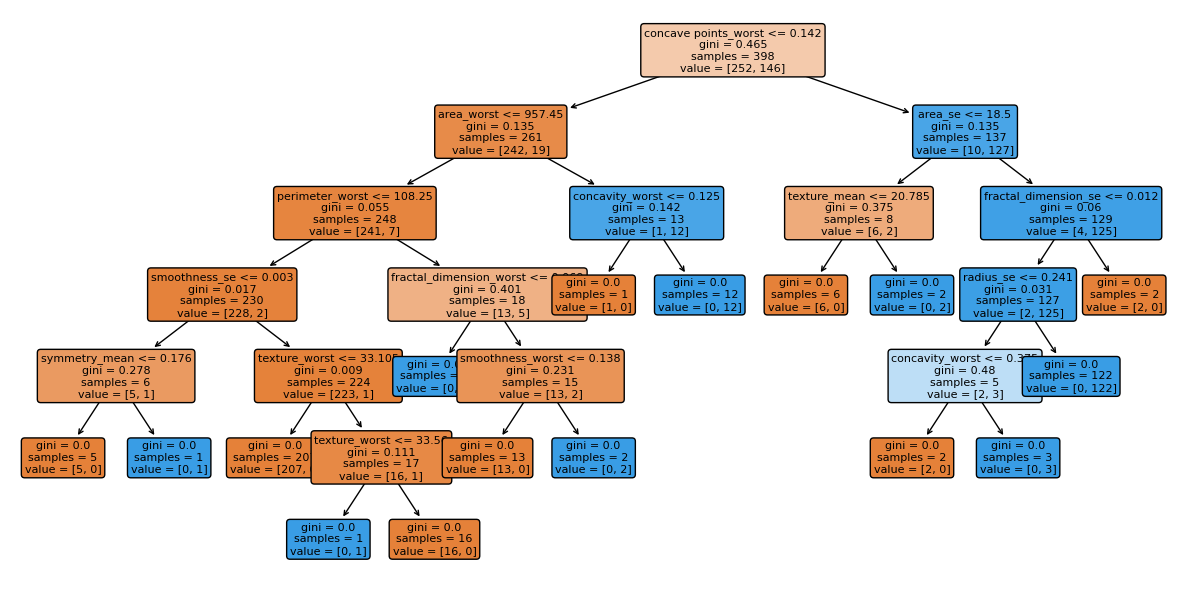

In [67]:
plt.figure(figsize=(12,6))
feature_names_list = X_train.columns.tolist()
plot_tree(tree,filled=True, feature_names=feature_names_list, rounded=True, fontsize=8) 
plt.tight_layout()
plt.show()

> ## Yes, I would prun the tree. ##
TREE pruning seems necessary to address the overfitting issue. Some nodes only have 1 sample, indicating the tree has too many splits, which is a sign of overfitting. 
Specifically, we can use min_sample_split to determine the amount of samples required to split the node, and min_sample_leaf to set the minimum number of samples in a leaf.
I can also use GridSearchCV to find the optimal parameters for the decision tree